In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [109]:
def box_comp(a, b):                                                    
    data = [a, b]                                             
    plt.figure(figsize=(12,8))                 
    plt.boxplot(data, showfliers = False, labels =                              
                ["Vanila Sampling", "norm_flow"])
    plt.grid()
    plt.show()

In [110]:
data = pd.read_csv('2dimressev.csv')
data.head(5)

,test n,learning rate,layer amount,hidden layer size,flow type,variance of p distr,max_amount of epochs,MC Vanila,norm_flow
0,0,0.001,3,3,realnvp,0.1,5000,"[1.018391728401184, 1.0052063465118408, 1.0261...","[1.0516717433929443, 1.1018359661102295, 1.069..."
1,1,0.001,3,3,realnvp,0.1,5000,"[1.0327441692352295, 1.0434844493865967, 1.051...","[1.041224718093872, 1.0545598268508911, 1.1645..."
2,2,0.001,3,3,realnvp,0.1,5000,"[0.9914205074310303, 0.9996729493141174, 0.996...","[1.0306094884872437, 1.0424857139587402, 0.989..."
3,3,0.001,3,3,realnvp,0.1,5000,"[1.054095983505249, 1.016518473625183, 1.03513...","[1.0003259181976318, 1.0019031763076782, 1.017..."
4,4,0.001,3,3,realnvp,0.1,5000,"[1.0335631370544434, 1.0092984437942505, 1.040...","[1.0954676866531372, 1.0640685558319092, 0.951..."


In [111]:
data.shape

(720, 9)

In [112]:
data['norm_flow'].isna().sum()

0

In [113]:
data.iloc[0, 7]

'[1.018391728401184, 1.0052063465118408, 1.0261987447738647, 1.0444837808609009, 1.0514572858810425, 1.0302553176879883, 1.0176441669464111, 1.0572386980056763, 1.0336499214172363, 1.0455670356750488, 1.016663670539856, 1.0096814632415771, 1.042747139930725, 1.0244455337524414, 1.0538712739944458, 1.024639368057251, 1.0808128118515015, 0.9667284488677979, 1.0179431438446045, 0.9926914572715759, 0.9860888123512268, 1.0196948051452637, 1.0443565845489502, 1.0403785705566406, 1.039329171180725, 1.0549147129058838, 1.0236023664474487, 1.0173379182815552, 1.0616379976272583, 1.0429580211639404, 1.0113948583602905, 1.0604665279388428, 1.007285714149475, 1.0497558116912842, 1.0251318216323853, 1.0402851104736328, 1.0028961896896362, 1.0299832820892334, 1.0086075067520142, 1.027137041091919, 1.0217405557632446, 1.0497626066207886, 1.0326255559921265, 1.038057565689087, 1.0322940349578857, 1.0325087308883667, 1.0103801488876343, 1.039648413658142, 1.0488386154174805, 1.0037531852722168, 1.04123

In [114]:
data.dtypes

test n                    int64
learning rate           float64
layer amount              int64
hidden layer size         int64
flow type                object
variance of p distr     float64
max_amount of epochs      int64
MC Vanila                object
norm_flow                object
dtype: object

In [115]:
def transf(s):
    s = s.replace('[', '')
    s = s.replace(']', '')
    s = s.split(',')
    return s

nums = list()
reg = list()
for i in range(data.shape[0]):
    mystr = data['norm_flow'].iloc[i]
    mystr = transf(mystr)
    if mystr[0] != 'nan':
        nums.append(np.array(list(map(float, mystr))))
        kek = transf(data['MC Vanila'].iloc[i])
        reg.append(np.array(list(map(float, kek))))
    else:
        nums.append(np.nan)
        reg.append(np.nan)
data['fl'] = nums
data['mc'] = reg
data.head(5)

,test n,learning rate,layer amount,hidden layer size,flow type,variance of p distr,max_amount of epochs,MC Vanila,norm_flow,fl,mc
0,0,0.001,3,3,realnvp,0.1,5000,"[1.018391728401184, 1.0052063465118408, 1.0261...","[1.0516717433929443, 1.1018359661102295, 1.069...","[1.0516717433929443, 1.1018359661102295, 1.069...","[1.018391728401184, 1.0052063465118408, 1.0261..."
1,1,0.001,3,3,realnvp,0.1,5000,"[1.0327441692352295, 1.0434844493865967, 1.051...","[1.041224718093872, 1.0545598268508911, 1.1645...","[1.041224718093872, 1.0545598268508911, 1.1645...","[1.0327441692352295, 1.0434844493865967, 1.051..."
2,2,0.001,3,3,realnvp,0.1,5000,"[0.9914205074310303, 0.9996729493141174, 0.996...","[1.0306094884872437, 1.0424857139587402, 0.989...","[1.0306094884872437, 1.0424857139587402, 0.989...","[0.9914205074310303, 0.9996729493141174, 0.996..."
3,3,0.001,3,3,realnvp,0.1,5000,"[1.054095983505249, 1.016518473625183, 1.03513...","[1.0003259181976318, 1.0019031763076782, 1.017...","[1.0003259181976318, 1.0019031763076782, 1.017...","[1.054095983505249, 1.016518473625183, 1.03513..."
4,4,0.001,3,3,realnvp,0.1,5000,"[1.0335631370544434, 1.0092984437942505, 1.040...","[1.0954676866531372, 1.0640685558319092, 0.951...","[1.0954676866531372, 1.0640685558319092, 0.951...","[1.0335631370544434, 1.0092984437942505, 1.040..."


In [116]:
data['layer amount'].value_counts()

3     240
9     240
15    240
Name: layer amount, dtype: int64

In [117]:
data['variance of p distr'][data['fl'].isna()].value_counts()

0.5    31
0.1     7
Name: variance of p distr, dtype: int64

In [118]:
import collections
c = collections.Counter()

In [119]:
#check how many relaunches does it take to run sucessfully
info = []
for i in range(0, data.shape[0], 5):
    cur = data.iloc[i:i+5]
    nan_attempts = cur['fl'].isna().sum()
    info.append(nan_attempts/5)

In [120]:
c.update(info)
c

Counter({0.0: 114, 0.2: 23, 0.4: 6, 0.6: 1})

In [121]:
all_vals = sum(c.values())
ans = 0

for key, val in c.items():
    ans += (key * 5) * val/all_vals
print("Expected number of fails:", ans)

Expected number of fails: 0.26388888888888884


In [122]:
#check how many shifts of bias are there for one setting
info = []
for i in range(0, data.shape[0], 5):
    cur = data.iloc[i:i+5]
    shifts = ((cur['mc'].apply(np.mean) - cur['fl'].apply(np.mean)).apply(abs) > 0.05).sum()
    info.append(shifts)
    if shifts > 2:
        print(cur.iloc[0][:'MC Vanila'].to_numpy()[:-1])
c = collections.Counter()
c.update(info)
c

[0 0.001 3 9 'maf' 0.1 20000]
[0 0.001 9 3 'maf' 0.5 5000]
[0 0.001 9 15 'maf' 0.5 20000]
[0 0.001 15 15 'realnvp' 0.5 5000]
[0 0.0001 3 3 'maf' 0.5 20000]
[0 0.0001 3 9 'realnvp' 0.5 20000]
[0 0.0001 3 9 'maf' 0.5 5000]
[0 0.0001 3 9 'maf' 0.5 20000]
[0 0.0001 3 15 'realnvp' 0.5 20000]
[0 0.0001 3 15 'maf' 0.5 20000]
[0 0.0001 9 3 'maf' 0.5 20000]
[0 0.0001 9 9 'realnvp' 0.5 5000]
[0 0.0001 9 15 'realnvp' 0.5 20000]
[0 0.0001 9 15 'maf' 0.5 5000]
[0 0.0001 15 9 'maf' 0.5 5000]
[0 0.0001 15 9 'maf' 0.5 20000]


Counter({0: 83, 1: 25, 2: 20, 3: 9, 4: 6, 5: 1})

[2 0.001 3 3 'maf' 0.5 5000]


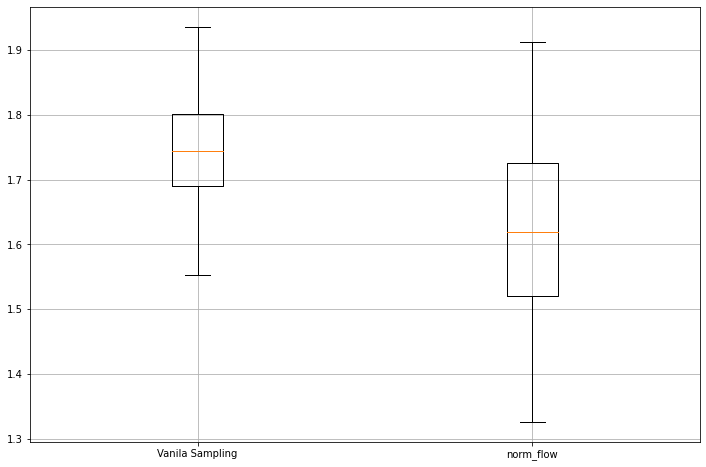

In [123]:
#check how many shifts of bias are there for one setting
for i in range(0, data.shape[0]):
    mc = data['mc'].iloc[i]
    fl = data['fl'].iloc[i]
    if abs(np.mean(mc)-np.mean(fl)) > 0.1:
        print(data.iloc[i][:'MC Vanila'].to_numpy()[:-1])
        box_comp(mc, fl)
        break

In [124]:
data.dropna(inplace=True)
data.shape

(682, 11)

In [125]:
data['fl_var'] = data['fl'].apply(np.var)
data.head(5)

,test n,learning rate,layer amount,hidden layer size,flow type,variance of p distr,max_amount of epochs,MC Vanila,norm_flow,fl,mc,fl_var
0,0,0.001,3,3,realnvp,0.1,5000,"[1.018391728401184, 1.0052063465118408, 1.0261...","[1.0516717433929443, 1.1018359661102295, 1.069...","[1.0516717433929443, 1.1018359661102295, 1.069...","[1.018391728401184, 1.0052063465118408, 1.0261...",0.001388
1,1,0.001,3,3,realnvp,0.1,5000,"[1.0327441692352295, 1.0434844493865967, 1.051...","[1.041224718093872, 1.0545598268508911, 1.1645...","[1.041224718093872, 1.0545598268508911, 1.1645...","[1.0327441692352295, 1.0434844493865967, 1.051...",0.024149
2,2,0.001,3,3,realnvp,0.1,5000,"[0.9914205074310303, 0.9996729493141174, 0.996...","[1.0306094884872437, 1.0424857139587402, 0.989...","[1.0306094884872437, 1.0424857139587402, 0.989...","[0.9914205074310303, 0.9996729493141174, 0.996...",0.011445
3,3,0.001,3,3,realnvp,0.1,5000,"[1.054095983505249, 1.016518473625183, 1.03513...","[1.0003259181976318, 1.0019031763076782, 1.017...","[1.0003259181976318, 1.0019031763076782, 1.017...","[1.054095983505249, 1.016518473625183, 1.03513...",0.000964
4,4,0.001,3,3,realnvp,0.1,5000,"[1.0335631370544434, 1.0092984437942505, 1.040...","[1.0954676866531372, 1.0640685558319092, 0.951...","[1.0954676866531372, 1.0640685558319092, 0.951...","[1.0335631370544434, 1.0092984437942505, 1.040...",0.035549


In [126]:
data.sort_values(by='fl_var', inplace=True)

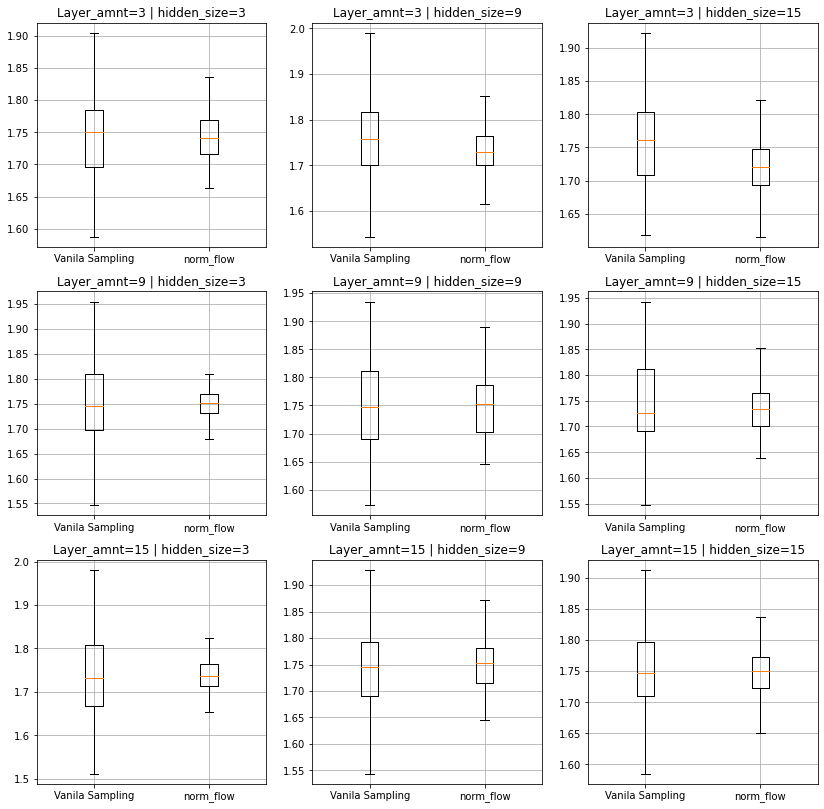

In [136]:
# see in what cases bias appears. supposedly, in every
plt.figure(figsize=(14, 14))
for i, ls in enumerate([3, 9, 15]):
    for j, hds in enumerate([3, 9, 15]):
        mc = None
        fl = None
        
        for k in range(0, data.shape[0]):
            curm = data['mc'].iloc[k]
            curf = data['fl'].iloc[k]
            if abs(np.mean(curm)-np.mean(curf)) < 0.025 and data['variance of p distr'].iloc[k] == 0.5 and \
                np.var(curm) > np.var(curf) and data['layer amount'].iloc[k] == ls \
                and data['hidden layer size'].iloc[k] == hds and \
                data['max_amount of epochs'].iloc[k] == 20*10**3:
                mc = data['mc'].iloc[k]
                fl = data['fl'].iloc[k]
                break
        if mc is None:
            for k in range(0, data.shape[0]):
                curm = data['mc'].iloc[k]
                curf = data['fl'].iloc[k]
                if abs(np.mean(curm)-np.mean(curf)) < 0.04 and data['variance of p distr'].iloc[k] == 0.5 and \
                    np.var(curm) > np.var(curf) and data['layer amount'].iloc[k] == ls \
                    and data['hidden layer size'].iloc[k] == hds and \
                    data['max_amount of epochs'].iloc[k] == 20*10**3:
                    mc = data['mc'].iloc[k]
                    fl = data['fl'].iloc[k]
                    break
        
        plt.subplot2grid((3, 3), (i, j))
        plt.grid()
        plt.title('Layer_amnt=' + str(ls) + ' | hidden_size=' + str(hds))
        if mc is None:
            continue
        ars = [mc, fl]                
        plt.boxplot(ars, showfliers = False, labels =                              
                    ["Vanila Sampling", "norm_flow"])
        

In [18]:
cnt = 0
for i in range(data.shape[0]):
    kek = data['mc'].iloc[i]
    mek = data['fl'].iloc[i]
    if np.var(kek) > np.var(mek):
        cnt += 1
cnt

217

In [137]:
cnt = 0
analys = []
st1 = []
st2 = []
an2 = []
for i in range(0, data.shape[0]):
    mc = data['mc'].iloc[i]
    fl = data['fl'].iloc[i]
    ls = data['layer amount'].iloc[i]
    hs = data['hidden layer size'].iloc[i]
    st = data['max_amount of epochs'].iloc[i]
    if abs(np.mean(mc)-np.mean(fl)) > 0.05 and data['variance of p distr'].iloc[i] == 0.5:
        cnt += 1
        analys.append((ls, hs))
        st1.append(st)
    else:
        an2.append((ls, hs))
        st2.append(st)
cnt

106

In [138]:
c = collections.Counter()
c.update(analys)
c

Counter({(3, 3): 7,
         (3, 15): 15,
         (9, 3): 9,
         (15, 9): 16,
         (3, 9): 18,
         (9, 15): 14,
         (15, 15): 11,
         (15, 3): 5,
         (9, 9): 11})

In [139]:
c = collections.Counter()
c.update(st1)
c

Counter({20000: 55, 5000: 51})

In [140]:
c = collections.Counter()
c.update(an2)
c

Counter({(15, 3): 73,
         (9, 15): 61,
         (3, 9): 60,
         (15, 9): 58,
         (9, 3): 68,
         (3, 3): 72,
         (9, 9): 62,
         (15, 15): 59,
         (3, 15): 63})

In [87]:
c = collections.Counter()
c.update(st2)
c

Counter({20000: 274, 5000: 287})

In [74]:
# check, whether every combination can be optimal
cnt = 0
cntr = {}
for i in range(data.shape[0]):
    mc = data['mc'].iloc[i]
    fl = data['fl'].iloc[i]
    if np.var(mc) > np.var(fl) \
        and abs(np.mean(mc)-np.mean(fl)) < 0.05 and data['variance of p distr'].iloc[i] == 0.1:
        ls = data['layer amount'].iloc[i]
        hs = data['hidden layer size'].iloc[i]
        if (ls, hs) in cntr:
            cntr[(ls, hs)] += 1
        else:
            cntr[(ls, hs)] = 1
cntr

{(15, 3): 6,
 (9, 15): 9,
 (3, 9): 14,
 (15, 9): 5,
 (9, 3): 14,
 (3, 3): 13,
 (9, 9): 7,
 (15, 15): 3,
 (3, 15): 9}

In [75]:
# check, whether every combination can be optimal
cnt = 0
cntr = {}
for i in range(data.shape[0]):
    mc = data['mc'].iloc[i]
    fl = data['fl'].iloc[i]
    if np.var(mc) > np.var(fl) \
        and abs(np.mean(mc)-np.mean(fl)) < 0.05 and data['variance of p distr'].iloc[i] == 0.5:
        ls = data['layer amount'].iloc[i]
        hs = data['hidden layer size'].iloc[i]
        if (ls, hs) in cntr:
            cntr[(ls, hs)] += 1
        else:
            cntr[(ls, hs)] = 1
cntr

{(3, 3): 23,
 (15, 15): 8,
 (9, 3): 16,
 (9, 9): 9,
 (15, 3): 15,
 (9, 15): 7,
 (3, 9): 11,
 (15, 9): 7,
 (3, 15): 6}

[1 0.0001 15 3 'maf' 0.1 20000]


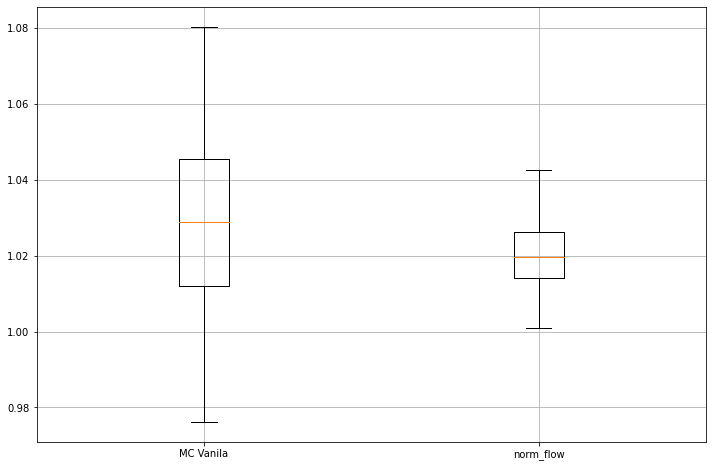

[4 0.001 9 15 'maf' 0.1 20000]


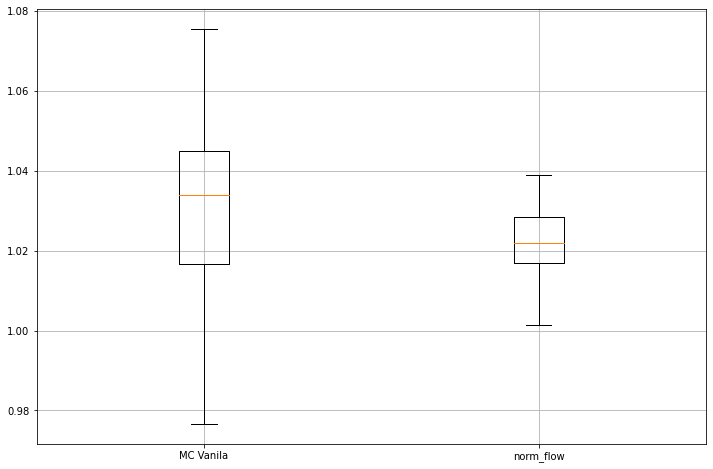

[0 0.0001 3 9 'maf' 0.1 5000]


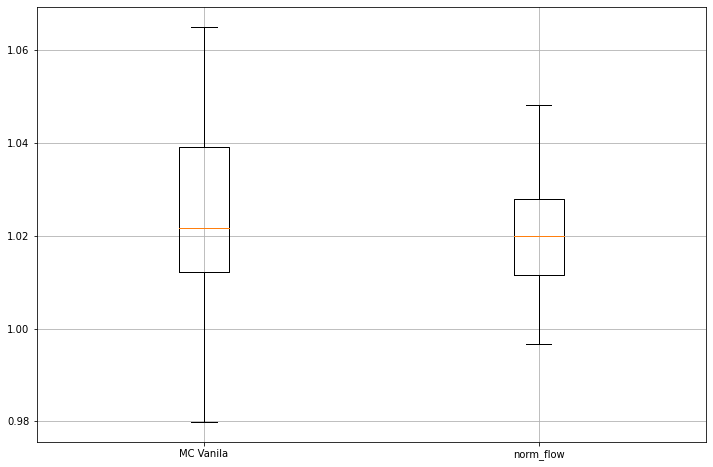

[1 0.0001 15 9 'maf' 0.1 20000]


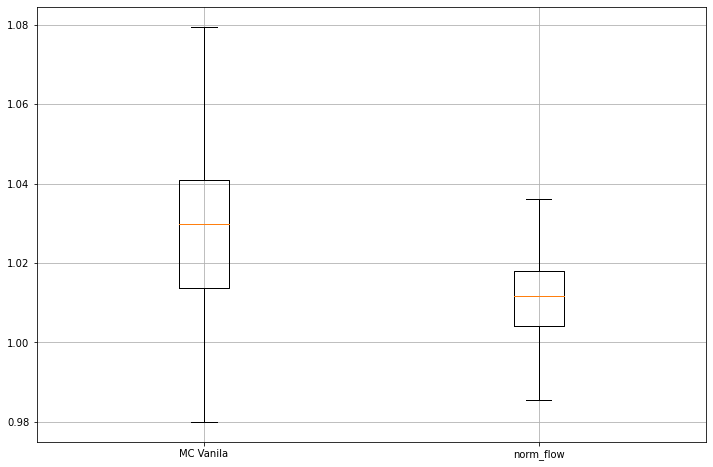

[3 0.001 9 15 'maf' 0.1 5000]


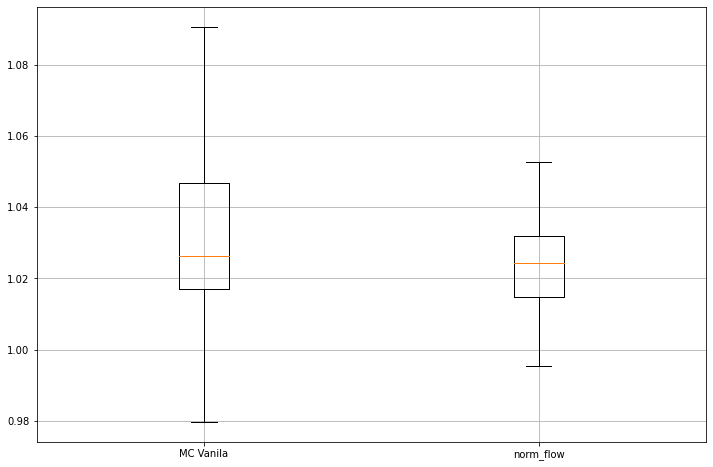

In [72]:
cnt = 0
for i in range(data.shape[0]):
    if cnt == 5:
        break
    mc = data['mc'].iloc[i]
    fl = data['fl'].iloc[i]
    if np.var(mc) > np.var(fl) \
        and abs(np.mean(mc)-np.mean(fl)) < 0.05 and data['variance of p distr'].iloc[i] == 0.1:
        cnt += 1
        print(data.iloc[i][:'MC Vanila'].to_numpy()[:-1])
        box_comp(mc, fl)

[2 0.0001 3 3 'realnvp' 0.5 5000]


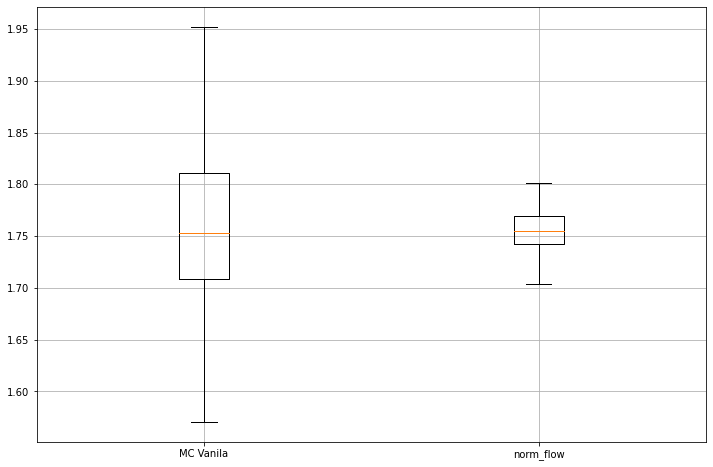

[1 0.001 15 15 'maf' 0.5 5000]


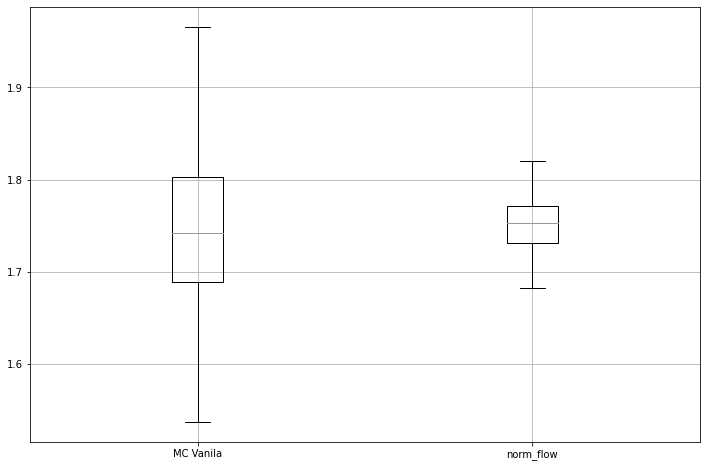

[0 0.001 9 3 'realnvp' 0.5 20000]


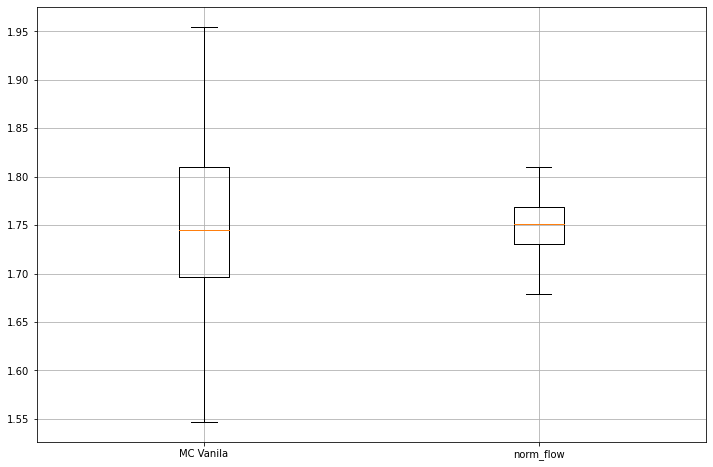

[0 0.001 9 9 'maf' 0.5 5000]


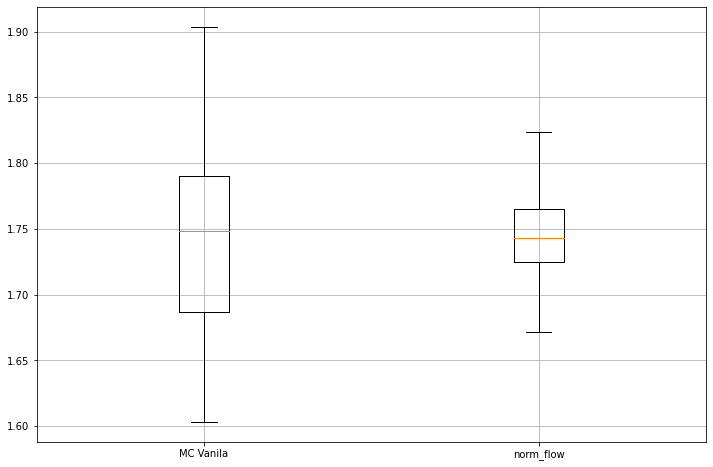

[4 0.0001 3 3 'maf' 0.5 5000]


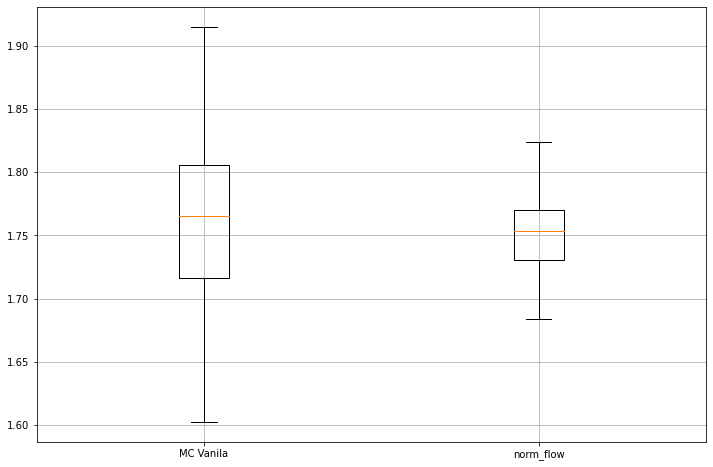

In [71]:
cnt = 0
for i in range(data.shape[0]):
    if cnt == 5:
        break
    mc = data['mc'].iloc[i]
    fl = data['fl'].iloc[i]
    if np.var(mc) > np.var(fl) \
        and abs(np.mean(mc)-np.mean(fl)) < 0.05 and data['variance of p distr'].iloc[i] == 0.5:
        cnt += 1
        print(data.iloc[i][:'MC Vanila'].to_numpy()[:-1])
        box_comp(mc, fl)